In [1]:
import cpm
from packaging import version

## cpm checks
print(cpm.__version__)
if version.parse(cpm.__version__) < version.parse("0.22"):
    raise ImportError("cpm version must be >= 0.22. Please install the latest version using: pip install --upgrade cpm")

0.24.6


## Import results

In [2]:
import pandas as pd
import numpy as np

## plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("05-model-recovery-results.csv")

In [3]:
data = data[["target", "model", "run", "fun"]]
data


,target,model,run,fun
0,delta,delta,0,23.059331
1,delta,delta,0,26.683399
2,delta,delta,0,37.170220
3,delta,delta,0,33.120735
4,delta,delta,0,35.196873
...,...,...,...,...
21595,anticorrelated,anticorrelated,99,38.584292
21596,anticorrelated,anticorrelated,99,33.349922
21597,anticorrelated,anticorrelated,99,25.438968
21598,anticorrelated,anticorrelated,99,60.340156


In [4]:
results = data.groupby(["target", "run", "model"]).sum().reset_index()
## which model ihad the lowest fun
# For each (target, run), find which model had the lowest fun
results['lowest_fun_model'] = results.groupby(['target', 'run'])['fun'].transform(lambda x: x.idxmin())
results['is_lowest'] = results.index == results['lowest_fun_model']
results[['target', 'run', 'model', 'fun', 'is_lowest']]

,target,run,model,fun,is_lowest
0,anticorrelated,0,anticorrelated,866.239182,True
1,anticorrelated,0,delta,1038.793504,False
2,anticorrelated,0,kernel,1051.874477,False
3,anticorrelated,1,anticorrelated,925.886793,True
4,anticorrelated,1,delta,1073.461200,False
...,...,...,...,...,...
895,kernel,98,delta,1082.442799,True
896,kernel,98,kernel,1084.175883,False
897,kernel,99,anticorrelated,965.265362,False
898,kernel,99,delta,866.880823,False


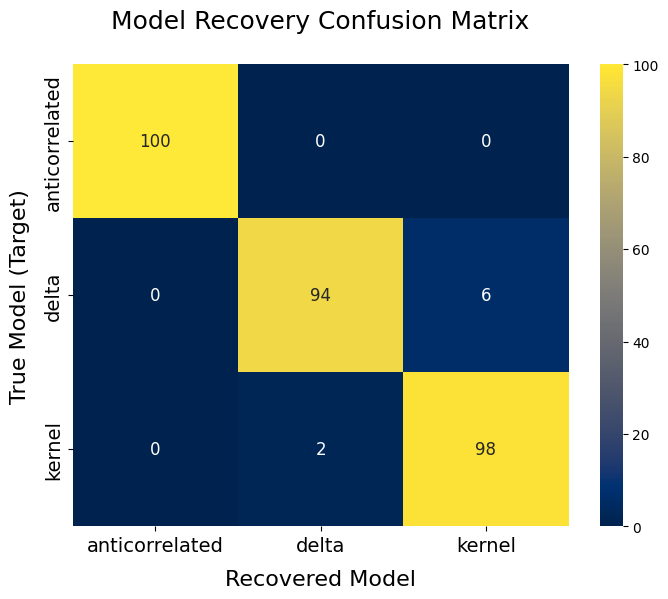

In [5]:
confusion_matrix = results[results.is_lowest == True].groupby(['target']).model.value_counts().astype('double').reset_index().pivot(index='target', columns='model', values='count').fillna(0).astype(int).reset_index()
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix.set_index('target'),
    annot=True,
    fmt='d',
    cmap='cividis',
    annot_kws={"size": 12}
)
plt.title('Model Recovery Confusion Matrix\n', fontsize=18)
plt.ylabel('True Model (Target)', fontsize=16, labelpad=10)
plt.xlabel('Recovered Model', fontsize=16, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [6]:
landscaping = data
data.head()

,target,model,run,fun
0,delta,delta,0,23.059331
1,delta,delta,0,26.683399
2,delta,delta,0,37.170220
3,delta,delta,0,33.120735
4,delta,delta,0,35.196873
